In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from helper_functions.grape_functions import get_state_index
from main_grape.Grape import Grape
from IPython import display
import numpy as np
%pylab inline


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy


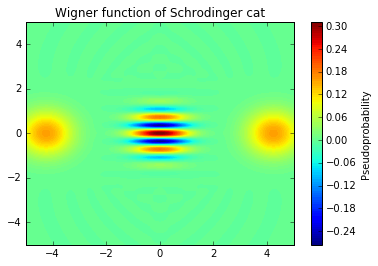

In [14]:
from qutip import *
from pylab import *  # loads matplotlib


def run():
    # Number of basis states
    N = 25

    # amplitude of coherent states
    alpha = 3

    # define displacement oeprators
    D1 = displace(N, alpha)
    D2 = displace(N, -alpha)

    # create superposition of coherent states
    psi = (D1 + D2) * basis(N, 0)/np.sqrt(2)

    # calculate Wigner function
    xvec = linspace(-5, 5, 200)
    yvec = xvec
    W = wigner(psi, xvec, yvec)

    # plot Wigner function as filled contour
    plt = contourf(xvec, yvec, W, 100)
    xlim([-5, 5])
    ylim([-5, 5])
    title('Wigner function of Schrodinger cat')

    # add a colorbar for pseudoprobability
    cbar = colorbar(plt)  # create colorbar
    cbar.ax.set_ylabel('Pseudoprobability')
    # show plot
    show()

    
    #print D1
if __name__ == "__main__":
    run()

In [2]:
GHZ_cpu = [0.0045,
0.00525,
0.006,
0.009,
0.0225,
0.0735,
0.25875,
1.452,
3.91125,
15.9075]
GHZ_gpu = [0.011,
0.01125,
0.015,
0.01675,
0.02,
0.031,
0.06175,
0.1525,
0.2925,
1.005]

QFT_cpu = [0.00475,
0.00575,
0.00925,
0.05,
0.18,
1.48,
11.47,
106.53]
QFT_gpu = [0.007,
0.00775,
0.00975,
0.01375,
0.02325,
0.0585,
0.26,
1.33]

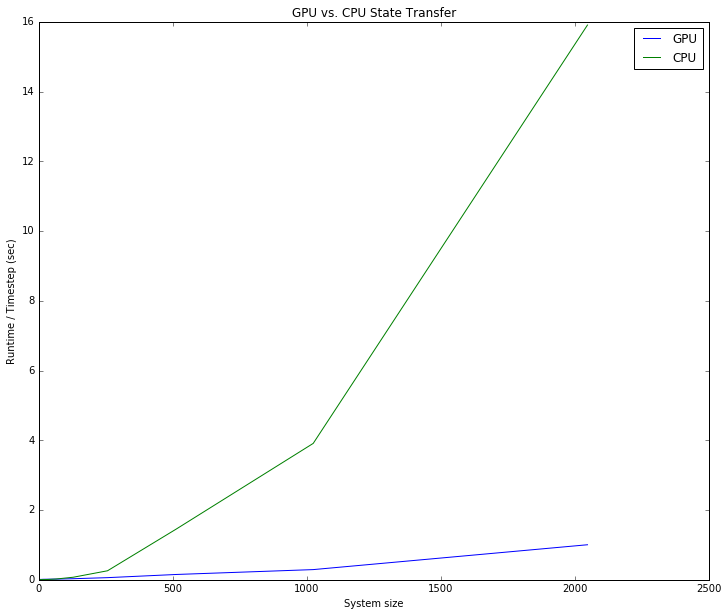

In [5]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 10)
plot(([2**ii for ii in range(2,12)]),GHZ_gpu, label = 'GPU')
plot(([2**ii for ii in range(2,12)]),GHZ_cpu, label='CPU')
plt.title('GPU vs. CPU State Transfer')
plt.ylabel('Runtime / Timestep (sec)')
plt.xlabel('System size')
plt.legend(loc=0)


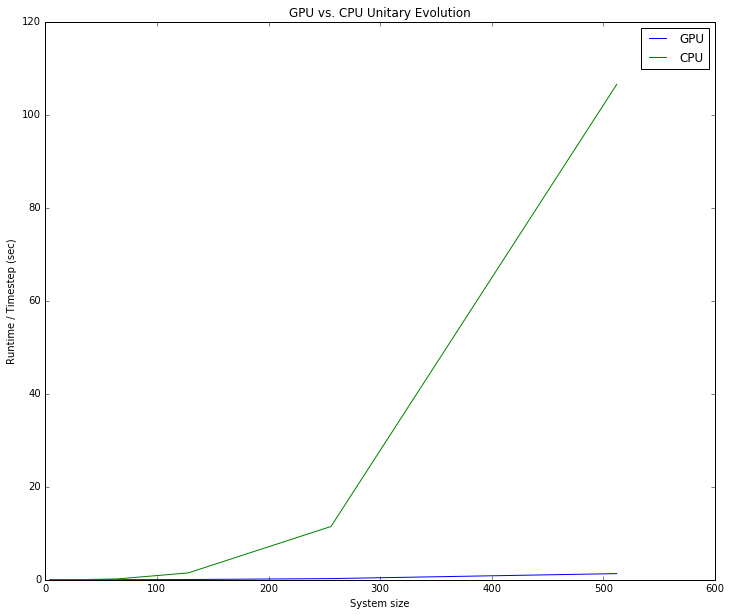

In [4]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 10)
plot(([2**ii for ii in range(2,10)]),QFT_gpu, label = 'GPU')
plot(([2**ii for ii in range(2,10)]),QFT_cpu, label='CPU')
plt.title('GPU vs. CPU Unitary Evolution')
plt.ylabel('Runtime / Timestep (sec)')
plt.xlabel('System size')
plt.legend(loc=0)
